# EMPLOYEE ATTRITION

-The goal of this project is to develop a model that predicts 'Status' as well as possible to figure out wether an employee   is likely to leave the company (Binary Classification)

-In this project we want to Maximize the Accuracy score of our models, As well as the F1 score which represents the           Harmanoy between two important metrics Presicion and Recall.

Gathering data 

In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')


In [2]:
#Reading Data 
data = pd.read_csv(r'C:\Users\Acer\Downloads\Employee-attrition.csv')
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


# EDA & Feature Engineering 


In [3]:
#checking size 

data.shape


(49653, 18)

In [4]:
#checking missing values

data.isnull().sum()


EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [6]:
#Removing duplicate entries

data.drop_duplicates(inplace=True)
data

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [7]:
data.head(10)


,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [8]:
cat_col = ['birthdate_key','orighiredate_key','terminationdate_key','city_name',
           'department_name','job_title','store_name','gender_short','termreason_desc',
           'termtype_desc','STATUS','BUSINESS_UNIT','store_name']
num_col = ['age','length_of_service','STATUS_YEAR']

In [9]:
#check the categorical columns unique values 
for col in cat_col:
    print(data.loc[:,col].value_counts(),'\n')

3/23/1973    40
8/4/1954     40
4/27/1956    40
3/6/1956     30
7/13/1972    30
             ..
9/14/1941     1
9/12/1941     1
9/1/1941      1
8/29/1941     1
6/13/1994     1
Name: birthdate_key, Length: 5342, dtype: int64 

9/25/2006     50
8/9/1992      50
2/26/2006     50
10/16/2005    50
12/4/2004     50
              ..
6/2/1993       1
7/9/1997       1
7/24/1997      1
7/25/1997      1
8/27/2013      1
Name: orighiredate_key, Length: 4415, dtype: int64 

1/1/1900      42450
12/30/2014     1079
12/30/2015      674
12/30/2010       25
11/11/2012       21
              ...  
11/13/2006        1
10/31/2006        1
10/30/2006        1
10/3/2006         1
9/14/2013         1
Name: terminationdate_key, Length: 1055, dtype: int64 

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               156

In [10]:
#Converting Job Titles into four Categories

board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

data['job_title'] = data['job_title'].map(job_title)


In [11]:
#check the categorical columns unique values 
for col in cat_col:
    print(data.loc[:,col].value_counts(),'\n')

3/23/1973    40
8/4/1954     40
4/27/1956    40
3/6/1956     30
7/13/1972    30
             ..
9/14/1941     1
9/12/1941     1
9/1/1941      1
8/29/1941     1
6/13/1994     1
Name: birthdate_key, Length: 5342, dtype: int64 

9/25/2006     50
8/9/1992      50
2/26/2006     50
10/16/2005    50
12/4/2004     50
              ..
6/2/1993       1
7/9/1997       1
7/24/1997      1
7/25/1997      1
8/27/2013      1
Name: orighiredate_key, Length: 4415, dtype: int64 

1/1/1900      42450
12/30/2014     1079
12/30/2015      674
12/30/2010       25
11/11/2012       21
              ...  
11/13/2006        1
10/31/2006        1
10/30/2006        1
10/3/2006         1
9/14/2013         1
Name: terminationdate_key, Length: 1055, dtype: int64 

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               156

In [12]:
city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

data['city_name'] = data['city_name'].map(city_population)

In [13]:
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

data['city_name'] = data.city_name.map(change_city)

In [14]:
data['city_name'].unique()

array(['mega', 'town', 'rural'], dtype=object)

In [15]:
data.head()


,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


# VISUALIZATION

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

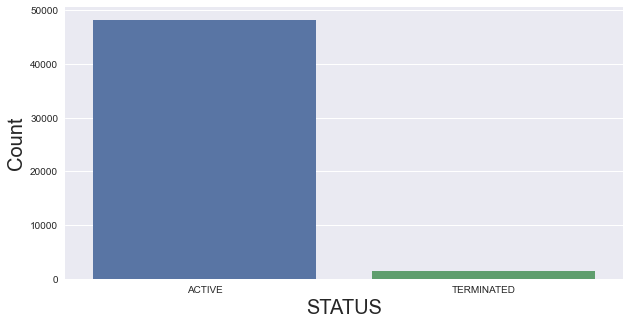

In [17]:
#checking target imbalance 

status_label = data.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(status_label.index, status_label);
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [19]:
#fixing target imbalances
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.STATUS=="ACTIVE"]
df_2 = data[data.STATUS=="TERMINATED"]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=48168,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.STATUS.value_counts()

ACTIVE        48168
TERMINATED    48168
Name: STATUS, dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

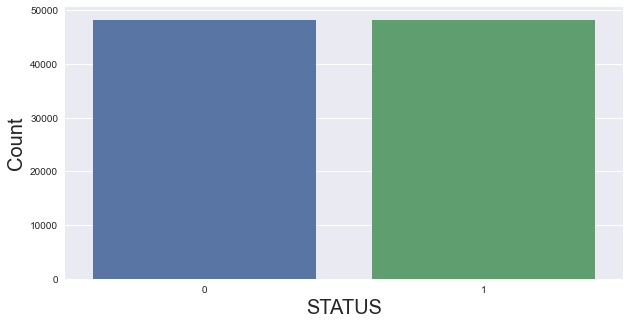

In [64]:
status_label = df_upsampled.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(status_label.index, status_label);
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

<AxesSubplot:xlabel='city_name', ylabel='count'>

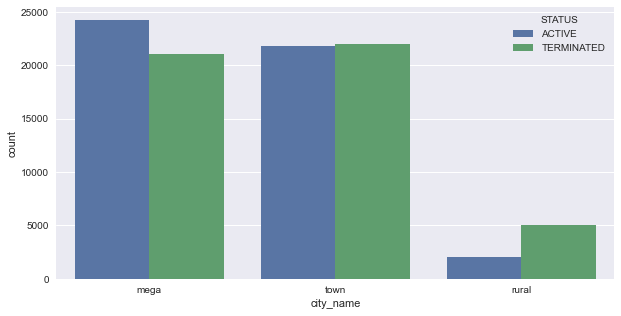

In [21]:
#Distribution of Status based on City Name

plt.figure(figsize=(10, 5))
sns.countplot(x="city_name", hue="STATUS", data=df_upsampled
            )

<AxesSubplot:xlabel='BUSINESS_UNIT', ylabel='count'>

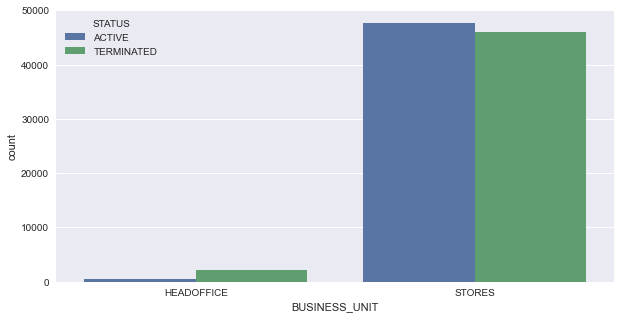

In [22]:
#Distribution of Status based on Business Unit


plt.figure(figsize=(10, 5))
sns.countplot(x="BUSINESS_UNIT", hue="STATUS", data=df_upsampled)

<AxesSubplot:xlabel='job_title', ylabel='count'>

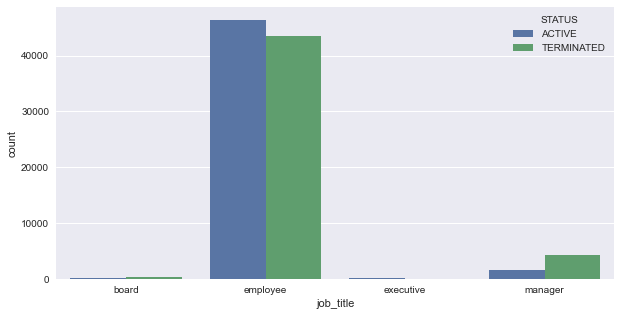

In [23]:
#Distribution of Status based on Job Title


plt.figure(figsize=(10, 5))
sns.countplot(x="job_title", hue="STATUS", data=df_upsampled)

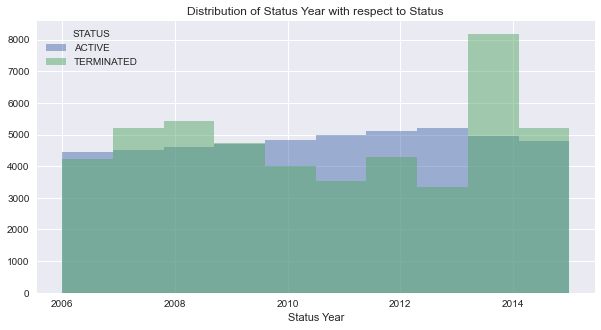

In [24]:
#Distribution of Status Year with respect to Status


plt.figure(figsize=(10, 5))
plt.hist("STATUS_YEAR", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("STATUS_YEAR", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Status Year with respect to Status")
plt.xlabel("Status Year")
plt.legend(title = "STATUS")
plt.show()

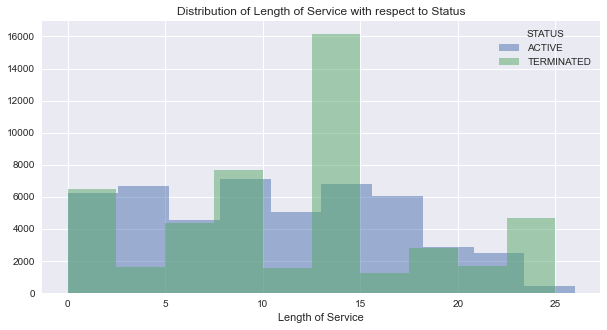

In [25]:
#Distribution of Length of Service with respect to Status


plt.figure(figsize=(10, 5))
plt.hist("length_of_service", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("length_of_service", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Length of Service with respect to Status")
plt.xlabel("Length of Service")
plt.legend(title = "STATUS")
plt.show()

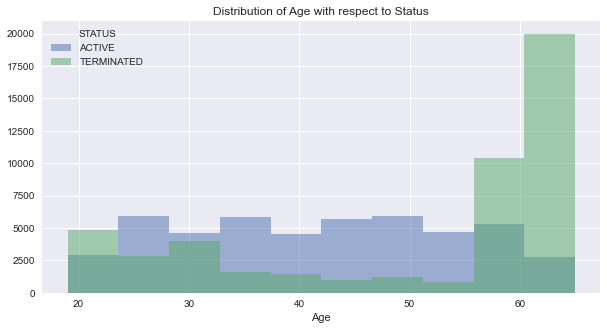

In [26]:
#Distribution of Age with respect to Status


plt.figure(figsize=(10, 5))
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Age with respect to Status")
plt.xlabel("Age")
plt.legend(title = "STATUS")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

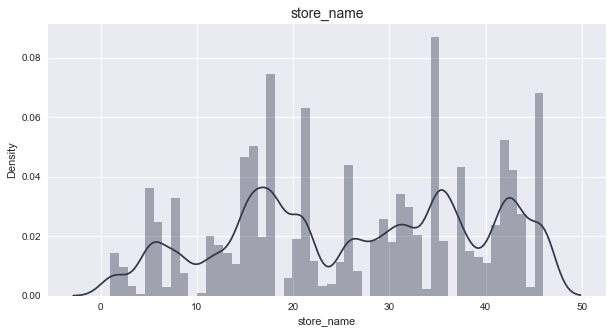

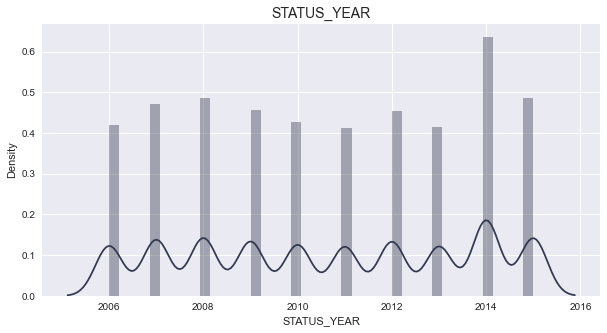

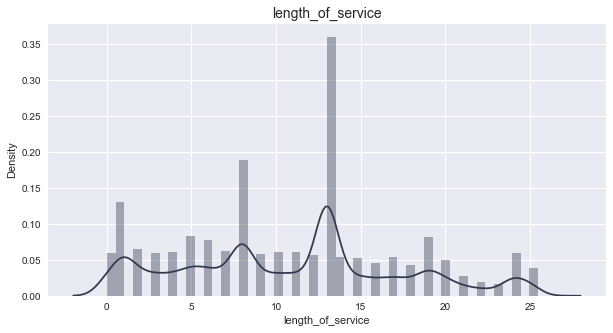

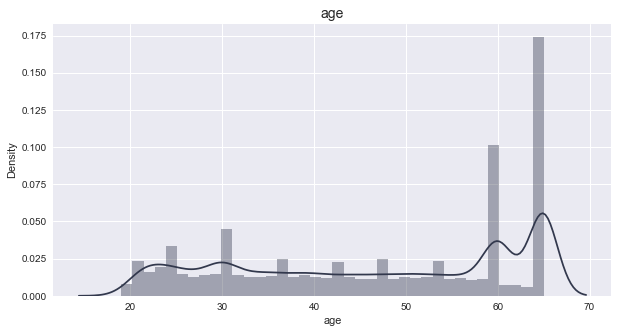

In [27]:
for column in ['store_name', 'STATUS_YEAR', 'length_of_service', 'age']:
    plt.figure(figsize=(10, 5))
    sns.distplot(df_upsampled[column], color = '#32384D', label = 'terminated',  kde = True)
    plt.title(column, size = 14)

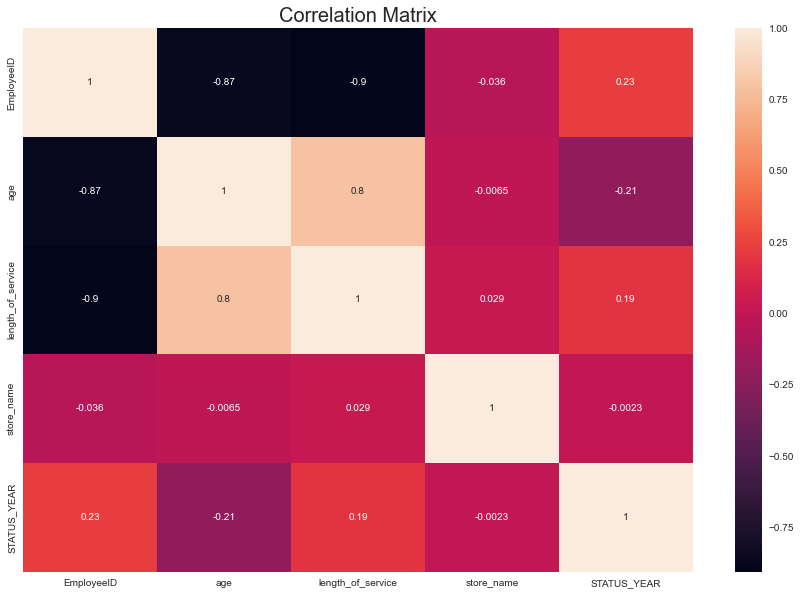

In [28]:
#checking corolations 

plt.figure(figsize=(15, 10))
sns.heatmap(df_upsampled.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [29]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report

# MODELING

In [30]:
label_map = {'ACTIVE': 0, 'TERMINATED': 1}
df_upsampled['STATUS'] = df_upsampled['STATUS'].map(label_map)
df_upsampled.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2006,0,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2007,0,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2008,0,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2009,0,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Male,Not Applicable,Not Applicable,2010,0,HEADOFFICE


In [31]:
cat_col = ['city_name',
           'department_name','job_title','store_name','gender_short',
           'BUSINESS_UNIT','store_name']
num_col = ['age','length_of_service','STATUS_YEAR']

for col in cat_col:
    df_upsampled.loc[:,col] = df_upsampled.loc[:,col].astype('category')

In [33]:
#performing train test split to avoid data leakage, test size is 10%

from sklearn.model_selection import train_test_split

target = df_upsampled.loc[:,'STATUS']
features = df_upsampled.drop('STATUS', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)

# Preprocessor Pipeline 

In [43]:
# build preprocessor pipeline

numeric_features = num_col
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = cat_col
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


# LOGISTIC REGRESSION

In [45]:
# Logistic Regression Model 

model_Lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))])


model_Lr.fit(features_train, target_train)
print("model score: %.3f" % model_Lr.score(features_train, target_train))

model score: 0.827


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# predecting target test 
target_test_pred_Lr = model_Lr.predict(features_test)



# model evaluation
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precision_Lr = precision_score(target_test, target_test_pred_Lr)
recall_Lr = recall_score(target_test, target_test_pred_Lr)
f1_score_Lr = f1_score(target_test, target_test_pred_Lr)

# print
print('Precision of Logistic regression model: ', precision_Lr)
print('Recall of Logistic regression model: ', recall_Lr)
print('f1 of Logistic regression model: ', f1_score_Lr)



Precision of Logistic regression model:  0.8508147808124856
Recall of Logistic regression model:  0.7802567880446222
f1 of Logistic regression model:  0.8140096618357487


In [48]:
confusion_matrix_Lr = confusion_matrix(target_test, target_test_pred_Lr)
print(confusion_matrix_Lr)

[[4233  650]
 [1044 3707]]


Confusion Matrix Logistic Regression: 


Text(0.5, 1.0, 'Confusion Matrix')

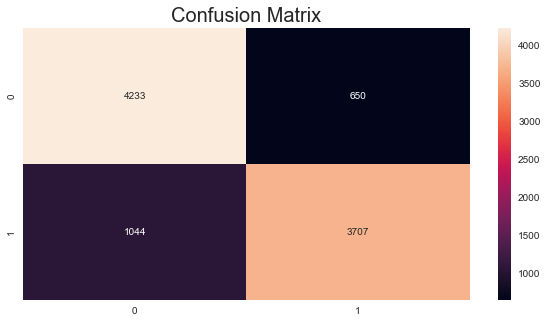

In [51]:
print("Confusion Matrix Logistic Regression: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(target_test, target_test_pred_Lr), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

# K NEAREST NEIGBHOUR

In [54]:
# K nearest neigbhour model 

from sklearn.neighbors import KNeighborsClassifier

model_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())])


model_knn.fit(features_train, target_train)

print("model score: %.3f" % model_knn.score(features_train, target_train))

model score: 0.981


In [55]:
# predecting target test 

target_test_pred_knn = model_knn.predict(features_test)



# model evaluation
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precision_knn = precision_score(target_test, target_test_pred_knn)
recall_knn = recall_score(target_test, target_test_pred_knn)
f1_score_knn = f1_score(target_test, target_test_pred_knn)

# print
print('Precision of knn model: ', precision_knn)
print('Recall of knn model: ', recall_knn)
print('f1 of knn model: ', f1_score_knn)



Precision of knn model:  0.9521319388576026
Recall of knn model:  0.9964218059355925
f1 of knn model:  0.9737735266892934


Confusion Matrix KNN: 


Text(0.5, 1.0, 'Confusion Matrix')

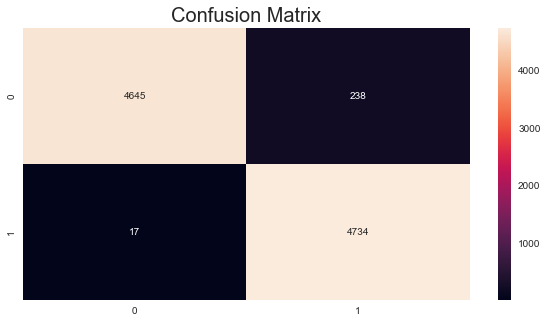

In [56]:
print("Confusion Matrix KNN: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(target_test, target_test_pred_knn), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

# Desicion tree model 


In [ ]:

from sklearn.tree import DecisionTreeClassifier

model_dt = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())])


model_dt.fit(features_train, target_train)

print("model score: %.3f" % model_dt.score(features_train, target_train))

In [58]:
# predecting target test 

target_test_pred_dt = model_dt.predict(features_test)



# model evaluation
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precision_dt = precision_score(target_test, target_test_pred_dt)
recall_dt = recall_score(target_test, target_test_pred_dt)
f1_score_dt = f1_score(target_test, target_test_pred_dt)

# print
print('Precision of desicion tree model: ', precision_dt)
print('Recall of desicion tree model: ', recall_dt)
print('f1 of desicion tree model: ', f1_score_dt)



Precision of desicion tree model:  0.9810035102209375
Recall of desicion tree model:  1.0
f1 of desicion tree model:  0.9904106733375027


Confusion Matrix DT: 


Text(0.5, 1.0, 'Confusion Matrix')

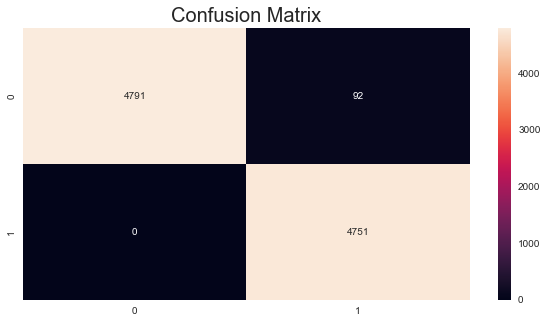

In [59]:
print("Confusion Matrix DT: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(target_test, target_test_pred_dt), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

# Random forrest model with grid search


In [35]:

model_rf = RandomForestClassifier(class_weight='balanced',random_state=0)

model_rf_pip = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model_rf)])

search_space = {'classifier__n_estimators' : [200]}
model_grid = GridSearchCV(estimator = model_rf_pip, 
                          param_grid = search_space,
                          scoring = 'f1',
                          cv=5
                          )
model_grid.fit(features_train,target_train)

best_parameters = model_grid.best_params_
best_accuracy = model_grid.best_score_
print(best_parameters)
print(best_accuracy)

{'classifier__n_estimators': 200}
0.9905890417992029


In [65]:
model_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'length_of_service',
                                                   'STATUS_YEAR']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city_name',
                                                   'department_name',
                                                   'job_title', 'store_name',
                                                   'gender_short',
                                                   'BUSINESS_UNIT',
                                                   'store_name'])])),
                ('classifier',
   

In [36]:
# predecting target test 

target_test_pred_rf = model_grid.predict(features_test)

precision_rf = precision_score(target_test, target_test_pred_rf)
recall_rf = recall_score(target_test, target_test_pred_rf)
f1_score_rf = f1_score(target_test, target_test_pred_rf)
accuracy_score_rf = accuracy_score(target_test, target_test_pred_rf)

# print
print('Precision of random forrest: ', precision_rf)
print('Recall of random forrest: ', recall_rf)
print('f1 of of random forrest: ', f1_score_rf)

print('acuraccy of of random forrest: ',accuracy_score_rf)

Precision of random forrest:  0.9834402815152142
Recall of random forrest:  1.0
f1 of of random forrest:  0.9916510123147569
acuraccy of of random forrest:  0.9916960763960971


Confusion Matrix Random forrest: 


Text(0.5, 1.0, 'Confusion Matrix')

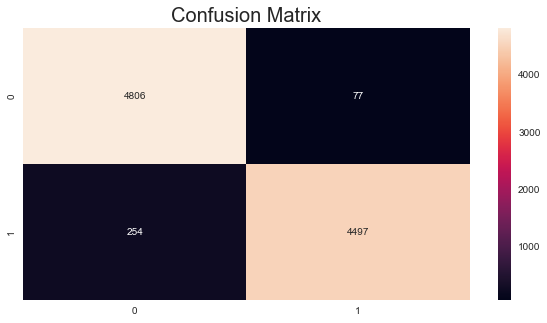

In [61]:
print("Confusion Matrix Random forrest: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(target_test, target_test_pred_rf), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

# Random forrest model & Interpretation 


In [37]:

model_rf = RandomForestClassifier(class_weight='balanced',random_state=0 ,max_depth=20,n_estimators=200)

model_rf_pip = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", model_rf)])

model_rf_pip.fit(features_train,target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'length_of_service',
                                                   'STATUS_YEAR']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['city_name',
                                                   'department_name',
                                                   'job_title', 'store_name',
                                                   'gender_short',
                                                   'BUSINESS_UNIT',
                                                   'store_name'])])),
                ('classifier',
   

In [38]:
# predecting target test 

target_test_pred_rf = model_rf_pip.predict(features_test)

precision_rf = precision_score(target_test, target_test_pred_rf)
recall_rf = recall_score(target_test, target_test_pred_rf)
f1_score_rf = f1_score(target_test, target_test_pred_rf)
accuracy_score_rf = accuracy_score(target_test, target_test_pred_rf)
# print
print('Precision of random forrest: ', precision_rf)
print('Recall of random forrest: ', recall_rf)
print('f1 of of random forrest: ', f1_score_rf)

print('acuraccy of of random forrest: ',accuracy_score_rf)


Precision of random forrest:  0.9831657192829034
Recall of random forrest:  0.9465375710376763
f1 of of random forrest:  0.9645040214477212
acuraccy of of random forrest:  0.965642516088852


In [39]:
confusion_matrix_rf = confusion_matrix(target_test, target_test_pred_rf)
print(confusion_matrix_rf)

[[4806   77]
 [ 254 4497]]


In [40]:
model_rf_pip.named_steps['classifier'].feature_importances_

array([3.79534096e-01, 1.53265332e-01, 9.91093832e-02, 6.98804668e-03,
       1.60461261e-02, 4.32843258e-03, 1.02738656e-04, 4.20143474e-05,
       3.29373499e-05, 3.80200458e-05, 1.18188175e-02, 2.67256924e-05,
       2.11836805e-02, 8.99736791e-03, 4.68884509e-05, 9.04306580e-04,
       5.62808861e-04, 4.42111938e-05, 3.43106095e-05, 3.15108682e-05,
       1.56702035e-05, 8.37278106e-03, 6.96175334e-03, 9.93902350e-03,
       1.24432142e-04, 1.66057629e-03, 2.29997145e-05, 8.10434583e-05,
       8.70638710e-03, 3.33695082e-04, 7.04986705e-03, 1.06396130e-03,
       4.28180778e-04, 4.54014517e-04, 5.88046746e-05, 1.48850639e-03,
       4.85266436e-04, 3.82341060e-04, 7.53582345e-04, 3.06136105e-03,
       2.19369743e-04, 6.07675452e-03, 1.18125188e-03, 3.92675753e-03,
       4.75507902e-03, 1.31348255e-03, 1.05982919e-03, 5.10601576e-04,
       1.27442950e-03, 1.16679790e-03, 8.06552798e-03, 8.54417078e-04,
       9.35749910e-04, 7.02291745e-04, 1.77914615e-03, 4.48571204e-04,
      

In [41]:
new_cat_cols = preprocessor.transformers_[1][1].get_feature_names(categorical_features)
col_list = np.concatenate([numeric_features, new_cat_cols])

feature_importance = pd.Series(data= model_rf_pip.named_steps['classifier'].feature_importances_,
                               index=col_list)
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

age                                     0.379534
length_of_service                       0.153265
STATUS_YEAR                             0.099109
department_name_Customer Service        0.021184
gender_short_F                          0.019253
                                          ...   
department_name_Accounts Receiveable    0.000033
department_name_Labor Relations         0.000032
department_name_Compensation            0.000027
department_name_Training                0.000023
department_name_Legal                   0.000016
Length: 127, dtype: float64

In [42]:
#visualising feauture importance of the first random forrest model

fig, ax = plt.subplots(figsize=[50,500])
feature_importance.sort_values().plot(kind='barh', ax=ax);